# Prova II de Biomecânica I - 2017

> http://demotu.org/ensino/biomecanica-i/

As soluções das questões das provas são apresentadas em Python. 

In [1]:
from sympy import Symbol, symbols, Matrix,latex
from sympy import cos, sin
from sympy.physics.mechanics import dynamicsymbols, init_vprinting
from IPython.display import display, Math
init_vprinting()
import numpy as np
t = Symbol('t')
l1, l2 = symbols('ell_1 ell_2', positive=True)
alpha1, alpha2 = dynamicsymbols('alpha1 alpha2')

## Diurno

**1** Considere as seguintes posições de marcas colocadas sobre uma coxa mensuradas por um sistema de captura do movimento: maléolo lateral (ml = [2.92, 10.10, 18.85]), maléolo medial (mm = [2.71, 10.22, 26.52]), cabeça da fíbula (fib = [5.05, 41.90, 15.41]), e côndilo medial da tíbia (tib = [8.29, 41.88, 26.52]). Estas posições estão na ordem x, y, z e são descritas no sistema de coordenadas do laboratório onde x aponta para a frente do sujeito, y aponta para cima e z aponta para o lado. Os centros articulares do tornozelo e joelho estão localizados respectivamente nos centros geométricos entre as marcas ml e mm e entre as marcas fib e tib. Um sistema de coordenadas anatômico para a perna pode ser definido como um eixo quase vertical apontando para cima e passando pelos centros articulares do tornozelo e joelho; outro eixo quase anteroposterior como o produto vetorial do eixo quase vertical e um vetor na direção médio-lateral passando por mm e ml; e o último eixo como o produto vetorial dos dois eixos anteriores, e a origem no centro articular do tornozelo.

a. [1,0] Calcule o sistema de coordenadas anatômico para a perna como descrito acima.

b. [1,0]  A partir do sistema de coordenadas, encontre a matriz de rotação que leva da coordenada local para a global e a matriz de rotação que leva da coordenada global para a local.

c. [2,0] Encontre os ângulos de Euler , considerando que a ordem de rotação foi feita em torno dos eixos do sistema de referência global YZX, nesta ordem. A matriz de rotação nesta sequência de rotação é dada abaixo:

In [30]:
ml = np.array([2.92, 10.10, 18.85])
mm = np.array([2.71, 10.22, 26.52])
fib = np.array([5.05, 41.90, 15.41])
tib = np.array([8.29, 41.88, 26.52])

tornoz = (ml + mm)/2
joelho = (fib + tib)/2

v1 = joelho - tornoz        # first axis
v2 = np.cross(v1, mm - ml)  # second axis
v3 = np.cross(v2, v1)       # third axis

# Vector normalization
e1 = v1/np.linalg.norm(v1)
e2 = v2/np.linalg.norm(v2)
e3 = v3/np.linalg.norm(v3)

print('Origem:', '\nO =', tornoz)
print('Versores:', '\ne1 =', e1, '\ne2 =', e2, '\ne3 =', e3)

Origem: 
O = [  2.815  10.16   22.685]
Versores: 
e1 = [ 0.12043275  0.99126617 -0.05373394] 
e2 = [ 0.99246903 -0.11900497  0.02903508] 
e3 = [-0.02238689  0.05682604  0.99813307]


In [8]:
Rlg = np.array([e1,e2,e3])
Rgl = Rlg.T
print('Rlg = ' + str(Rlg))
print('\nRgl = ' + str(Rgl))

Rlg = [[ 0.12043275  0.99126617 -0.05373394]
 [ 0.99246903 -0.11900497  0.02903508]
 [-0.02238689  0.05682604  0.99813307]]

Rgl = [[ 0.12043275  0.99246903 -0.02238689]
 [ 0.99126617 -0.11900497  0.05682604]
 [-0.05373394  0.02903508  0.99813307]]


$\alpha = \arctan\left(\frac{Rgl[2,1]}{Rgl[1,1]}\right)$

$\beta = \arctan\left(\frac{Rgl[0,2]}{Rgl[0,0]}\right)$

$\gamma = \arctan\left(\frac{-Rgl[0,1]}{\sqrt{(Rgl[1,1]^2+Rgl[2,1]^2)}}\right)$

In [40]:
alpha = np.arctan2(Rgl[2,1],Rgl[1,1])*180/np.pi
beta = np.arctan2(Rgl[0,2],Rgl[0,0])*180/np.pi
gamma = np.arctan2(-Rgl[0,1],np.sqrt(Rgl[1,1]**2+Rgl[2,1]**2))*180/np.pi

print('alpha = ' + str(alpha) + ' graus')
print('beta = ' + str(beta) + ' graus')
print('gamma = ' + str(gamma) + ' graus')

alpha = 166.288730743 graus
beta = -10.5303538359 graus
gamma = -82.9638360669 graus


**2** (3 pontos) Uma pessoa segura com a mão uma extremidade de um bastão com comprimento . Tanto a mão da pessoa quanto o bastão se movem no plano paralelo ao solo.  A mão da pessoa segue a seguinte trajetória ao longo do tempo: , medida em relação a um ponto fixo. A velocidade angular do bastão  durante o movimento foi de . A posição inicial da extremidade B do bastão que não está sendo segurada pela mão da pessoa é .
a. [0,5] Calcule a velocidade da mão da pessoa.

b. [0,5] Calcule o vetor posição do ponto B em relação à mão da pessoa no instante inicial.

c. [0,5] Calcule o vetor posição do ponto B em relação à mão da pessoa ao longo da trajetória.

d. [1,0] Calcule a velocidade do ponto B do bastão ao longo do tempo.

e. [0,5] Calcule a aceleração do ponto B do bastão ao longo do tempo.

Velocidade da mão:

$\vec{v}_M = 0,3\hat{i}+0,1\hat{j} $

Posição do ponto B no instante inicial:

$\vec{r_{B/M}}(0) = \vec{r_{B}}(0) - \vec{r_{M}}(0) = 6\hat{i}+6\hat{j} - 4\hat{i} - 6\hat{j} = 2\hat{i}$

Posição do ponto B:

$\vec{r_{B/M}} = l\cos(\omega t)\hat{i} + l\sin(\omega t) \hat{j} = 2\cos(3t)\hat{i} + 2\sin(3t) \hat{j} $

Velocidade do ponto B:

$\vec{v_{B}} = \vec{v_{M}} + \vec{\omega}\times\vec{r_{B/M}} = 0,3\hat{i}+0,1\hat{j} +  3\hat{k}\times(2\cos(3t)\hat{i} + 2\sin(3t) \hat{j})=$
$=0,3\hat{i}+0,1\hat{j} - 6\sin(3t)\hat{i}+6\cos(3t)\hat{j} = (0,3- 6\sin(3t))\hat{i}+(0,1 +6\cos(3t))\hat{j}$

Aceleração do ponto B:

$\vec{a_{B}} = \frac{d\vec{v_{B}}}{dt} = -18\cos(3t)\hat{i}-18\sin(3t)\hat{j}$


<figure><img src='./../images/prova2dfig3.png' width="150" style="float:right;margin: 0px 50px;"/></figure>

**3** Considere a cadeia cinemática representada ao lado. Calcule a expressão para:  
a) (1,0) A posição do ponto P em termos dos ângulos articulares.  
b) (1,0) O Jacobiano para esta cadeia cinemática.  
c) (1,0) Velocidade linear do ponto P em termos dos ângulos articulares.  

A posição do ponto P em termos dos ângulos articulares:

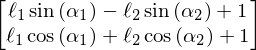

In [2]:
rp = Matrix([1 + l1*sin(alpha1) - l2*sin(alpha2),
             1 + l1*cos(alpha1) + l2*cos(alpha2)])
rp

Onde $\alpha_1$ e $\alpha_2$ são considerados ângulos positivos como indicado na figura.

O Jacobiano para esta cadeia cinemática:

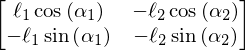

In [3]:
J = rp.jacobian([alpha1, alpha2])
J

Velocidade linear do ponto P em termos dos ângulos articulares:

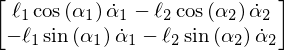

In [4]:
w = Matrix([alpha1, alpha2]).diff(t)
vel = J*w
vel

## Noturno

**1** (4 pontos) Considere as seguintes posições de marcas colocadas sobre uma coxa mensuradas por um sistema de captura do movimento: epicôndilo lateral (el = [2.92, 10.10, 18.85]) e epicôndilo medial (em = [2.71, 10.22, 26.52]). Além disso, foi estimada a posição da cabeça do trocanter deste fêmur (tr = [5.05, 41.90, 15.41]). Estas posições estão na ordem x, y, z e são descritas no sistema de coordenadas do laboratório onde x aponta para a frente do sujeito, y aponta para cima e z aponta para o lado. O centro articular do joelho está localizado no centro geométrico entre as marcas el e em o centro articular do quadril coincide com a cabeça do trocanter. Um sistema de coordenadas anatômico para a coxa pode ser definido como um eixo quase vertical apontando para cima e passando pelos centros articulares do joelho e do quadril; outro eixo quase anteroposterior apontando para frente como o produto vetorial do eixo quase vertical e um vetor na direção médio-lateral passando por el e em; e o último eixo como o produto vetorial dos dois eixos anteriores, e a origem no centro articular do joelho.

a. [1,0] Calcule o sistema de coordenadas anatômico para a coxa como descrito acima.

b. [1,0]  A partir do sistema de coordenadas, encontre a matriz de rotação que leva da coordenada local para a global e a matriz de rotação que leva da coordenada global para a local.

c. [2,0]  Encontre os ângulos de Euler , considerando que a ordem de rotação foi feita em torno dos eixos do sistema de referência global ZXY, nesta ordem. A matriz de rotação nesta sequência de rotação é dada abaixo:

In [42]:
el = np.array([2.92, 10.10, 18.85])
em = np.array([2.71, 10.22, 26.52])
tr = np.array([5.05, 41.90, 15.41])

quadri = tr
joelho = (el + em)/2

v1 = quadri - joelho        # first axis
v2 = np.cross(v1, em - el)  # second axis
v3 = np.cross(v2, v1)       # third axis

# Vector normalization
e1 = v1/np.linalg.norm(v1)
e2 = v2/np.linalg.norm(v2)
e3 = v3/np.linalg.norm(v3)

print('Origem:', '\nO =', joelho)
print('Versores:', '\ne1 =', e1, '\ne2 =', e2, '\ne3 =', e3)

Origem: 
O = [  2.815  10.16   22.685]
Versores: 
e1 = [ 0.06847494  0.97243612 -0.22288824] 
e2 = [ 0.99756392 -0.06375548  0.02831018] 
e3 = [-0.0133195   0.22428381  0.97443284]


In [43]:
Rlg = np.array([e1,e2,e3])
Rgl = Rlg.T
print('Rlg = ' + str(Rlg))
print('\nRgl = ' + str(Rgl))

Rlg = [[ 0.06847494  0.97243612 -0.22288824]
 [ 0.99756392 -0.06375548  0.02831018]
 [-0.0133195   0.22428381  0.97443284]]

Rgl = [[ 0.06847494  0.99756392 -0.0133195 ]
 [ 0.97243612 -0.06375548  0.22428381]
 [-0.22288824  0.02831018  0.97443284]]


$\alpha = \arctan\left(\frac{-Rgl[1,2]}{\sqrt{(Rgl[0,2]^2+Rgl[2,2]^2)}}\right)$

$\beta = \arctan\left(\frac{Rgl[0,2]}{Rgl[2,2]}\right)$

$\gamma = \arctan\left(\frac{Rgl[1,0]}{Rgl[1,1]}\right)$

In [47]:
alpha = np.arctan2(-Rgl[1,2],np.sqrt(Rgl[0,2]**2+Rgl[2,2]**2))*180/np.pi
beta = np.arctan2(Rgl[0,2],Rgl[2,2])*180/np.pi
gamma = np.arctan2(Rgl[1,0],Rgl[1,1])*180/np.pi

print('alpha = ' + str(alpha) + ' graus')
print('beta = ' + str(beta) + ' graus')
print('gamma = ' + str(gamma) + ' graus')

alpha = -12.9607669696 graus
beta = -0.783125663366 graus
gamma = 93.7510938527 graus


**2** (3 pontos) Uma pessoa segura com a mão uma extremidade de um bastão com comprimento . Tanto a mão da pessoa quanto o bastão se movem no plano paralelo ao solo.  A mão da pessoa segue a seguinte trajetória ao longo do tempo: , medida em relação a um ponto fixo. A velocidade angular do bastão  durante o movimento foi de .  A posição inicial da extremidade B do bastão que não está sendo segurada pela mão da pessoa é  .

a. [0,5] Calcule a velocidade da mão da pessoa.

b. [0,5] Calcule o vetor posição do ponto B em relação à mão da pessoa no instante inicial.

c. [0,5] Calcule o vetor posição do ponto B em relação à mão da pessoa ao longo da trajetória.

d. [1,0] Calcule a velocidade do ponto B do bastão ao longo do tempo.

e. [0,5] Calcule a aceleração do ponto B do bastão ao longo do tempo.

Velocidade da mão:

$\vec{v}_M = 0,2\hat{i}+0,5\hat{j} $

Posição do ponto B no instante inicial:

$\vec{r_{B/M}}(0) = \vec{r_{B}}(0) - \vec{r_{M}}(0) = 6\hat{i}+10\hat{j} - 5\hat{i} - 10\hat{j} = 1\hat{i}$

Posição do ponto B:

$\vec{r_{B/M}} = l\cos(\omega t)\hat{i} + l\sin(\omega t) \hat{j} = \cos(2t)\hat{i} + \sin(2t) \hat{j} $

Velocidade do ponto B:

$\vec{v_{B}} = \vec{v_{M}} + \vec{\omega}\times\vec{r_{B/M}} = 0,2\hat{i}+0,5\hat{j} +  2\hat{k}\times(\cos(2t)\hat{i} + \sin(2t) \hat{j})=$
$=0,2\hat{i}+0,5\hat{j} - 2\sin(2t)\hat{i}+2\cos(2t)\hat{j} = (0,2- 2\sin(2t))\hat{i}+(0,2 +2\cos(2t))\hat{j}$

Aceleração do ponto B:

$\vec{a_{B}} = \frac{d\vec{v_{B}}}{dt} = -4\cos(2t)\hat{i}-4\sin(2t)\hat{j}$

<figure><img src='./../images/prova2nfig3.png' width="200" style="float:right;margin: 0px 50px;"/></figure>

**3** Considere a cadeia cinemática representada ao lado. Calcule a expressão para:  
a) (1,0) A posição do ponto P em termos dos ângulos articulares.  
b) (1,0) O Jacobiano para esta cadeia cinemática.  
c) (1,0) Velocidade linear do ponto P em termos dos ângulos articulares.  


A posição do ponto P em termos dos ângulos articulares:

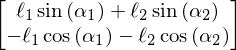

In [5]:
rp = Matrix([l1*sin(alpha1) + l2*sin(alpha2),
            -l1*cos(alpha1) - l2*cos(alpha2)])
rp

Onde $\alpha_1$ e $\alpha_2$ são considerados ângulos positivos como indicado na figura.

O Jacobiano para esta cadeia cinemática:

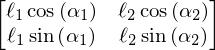

In [6]:
J = rp.jacobian([alpha1, alpha2])
J

Velocidade linear do ponto P em termos dos ângulos articulares:

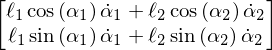

In [7]:
w = Matrix([alpha1, alpha2]).diff(t)
vel = J*w
vel